<a href="https://colab.research.google.com/github/vivekpenuli/Basic-tensor/blob/master/tensor_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
print(tf.__version__)

1.15.2


In [4]:
x_data=np.linspace(1,11,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 1.58068415,  3.35979394,  3.67834487,  3.46153039,  6.52541741,
        5.16646431,  7.31135882,  9.12726564,  9.44791248, 10.97945416])

In [5]:
y_label=np.linspace(1,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([ 1.29611818,  0.94787321,  3.7841713 ,  3.28921019,  3.53094082,
        6.78184813,  5.77579562,  8.07828109, 10.32001236, 10.02451273])

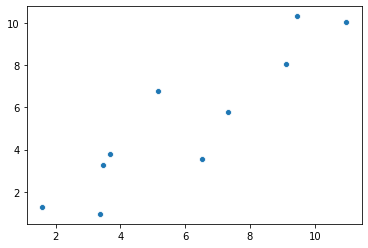

In [6]:
ax = sns.scatterplot(x=x_data, y=y_label)

In [7]:
weight=tf.Variable(initial_value=0.1)
bias=tf.Variable(initial_value=0.01)

In [8]:
xph=tf.placeholder(tf.float32)
yph=tf.placeholder(tf.float32)
n = len(x_data)
print(n)

10


In [9]:
y_pred = tf.add(tf.multiply(xph, weight), bias) 
pickle=(tf.pow(y_pred-y_label, 2)) / (2 * n) 
piko=y_pred-y_label     # here the y_pred is subtracted from each element of y_label array

cost = tf.reduce_sum(tf.pow(y_pred-y_label, 2)) / (2 * n) 

In [10]:
sub=tf.math.subtract(y_pred,y_label) 


In [11]:
optimiser=tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
init=tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
x = tf.constant([0.05484341, 0.03746411, 0.3706576 , 0.56825775, 1.8686898,  1.554816, 2.7932866  ,3.4296746 , 4.3673615 , 4.376917  ])
glo=tf.reduce_sum(x) 
with tf.Session() as sess:
  re=sess.run(glo)
  print(re)

19.421968


In [13]:
with tf.Session() as sess:       
    sess.run(init) # first step variable initaliser 
    for (_x, _y) in zip(x_data, y_label): 
      print(_x,_y)     

1.5806841542995458 1.2961181832420778
3.359793941029797 0.9478732079943806
3.6783448743245386 3.7841713042645106
3.461530390189099 3.289210188256488
6.52541740556581 3.5309408219134992
5.166464308711637 6.781848132831346
7.311358824633523 5.775795617466726
9.127265644900676 8.07828109066358
9.447912482813493 10.320012359203469
10.979454158590567 10.024512727165604


In [14]:
with tf.Session() as sess:       
    sess.run(init)                
    for (_x, _y) in zip(x_data, y_label): 
      result=sess.run(y_pred,feed_dict={xph:_x,yph:_y})          # here x*weight +bias  happen
      print(result)   # in output we find predicted element of each element
# this is our predicted element it is jsut y(predicted) not ( y-y(predicted))**2

0.16806842
0.3459794
0.3778345
0.35615304
0.66254175
0.52664644
0.7411359
0.9227266
0.95479125
1.1079454


In [15]:
with tf.Session() as sess:       
    sess.run(init)                 
    for (_x, _y) in zip(x_data, y_label): 
      result5=sess.run(sub,feed_dict={xph:_x,yph:_y})  
      print(result5) # since the problem is that y_label is entire an array therfore individual elment are not subtracted like this
  # here the predicted element is subtracted from y_label (y-y(predict))

[ -1.1280497  -0.7798048  -3.616103   -3.1211417  -3.3628724  -6.613779
  -5.607727   -7.9102125 -10.151943   -9.856443 ]
[-0.95013875 -0.60189384 -3.438192   -2.9432306  -3.1849613  -6.4358683
 -5.429816   -7.7323017  -9.974032   -9.678533  ]
[-0.91828364 -0.57003874 -3.4063368  -2.9113755  -3.1531062  -6.404013
 -5.3979607  -7.7004466  -9.942178   -9.646678  ]
[-0.9399651 -0.5917202 -3.4280183 -2.933057  -3.1747878 -6.4256945
 -5.419642  -7.722128  -9.963859  -9.668359 ]
[-0.6335764 -0.2853315 -3.1216297 -2.6266685 -2.8683991 -6.119306
 -5.1132536 -7.4157395 -9.65747   -9.36197  ]
[-0.7694717 -0.4212268 -3.257525  -2.7625637 -3.0042944 -6.2552013
 -5.249149  -7.551635  -9.7933655 -9.497866 ]
[-0.55498224 -0.20673734 -3.0430355  -2.5480742  -2.789805   -6.040712
 -5.0346594  -7.3371453  -9.578876   -9.283376  ]
[-0.37339157 -0.02514666 -2.8614447  -2.3664834  -2.6082141  -5.8591213
 -4.853069   -7.155555   -9.397285   -9.101786  ]
[-3.4132689e-01  6.9180131e-03 -2.8293800e+00 -2.33441

In [16]:
with tf.Session() as sess:       
    sess.run(init)                 
    for (_x, _y) in zip(x_data, y_label): 
      result2=sess.run(piko,feed_dict={xph:_x,yph:_y})          
      print(result2)   # here [y(predict)- y_label]  [(-0.0359)-1.011]

[ -1.1280497  -0.7798048  -3.616103   -3.1211417  -3.3628724  -6.613779
  -5.607727   -7.9102125 -10.151943   -9.856443 ]
[-0.95013875 -0.60189384 -3.438192   -2.9432306  -3.1849613  -6.4358683
 -5.429816   -7.7323017  -9.974032   -9.678533  ]
[-0.91828364 -0.57003874 -3.4063368  -2.9113755  -3.1531062  -6.404013
 -5.3979607  -7.7004466  -9.942178   -9.646678  ]
[-0.9399651 -0.5917202 -3.4280183 -2.933057  -3.1747878 -6.4256945
 -5.419642  -7.722128  -9.963859  -9.668359 ]
[-0.6335764 -0.2853315 -3.1216297 -2.6266685 -2.8683991 -6.119306
 -5.1132536 -7.4157395 -9.65747   -9.36197  ]
[-0.7694717 -0.4212268 -3.257525  -2.7625637 -3.0042944 -6.2552013
 -5.249149  -7.551635  -9.7933655 -9.497866 ]
[-0.55498224 -0.20673734 -3.0430355  -2.5480742  -2.789805   -6.040712
 -5.0346594  -7.3371453  -9.578876   -9.283376  ]
[-0.37339157 -0.02514666 -2.8614447  -2.3664834  -2.6082141  -5.8591213
 -4.853069   -7.155555   -9.397285   -9.101786  ]
[-3.4132689e-01  6.9180131e-03 -2.8293800e+00 -2.33441

2.3e-5, means 2.3 times ten to the minus five power, or 0.000023
4.5e6 means
 4.5 times ten to the sixth power, or 4500000 which is the same as 4,500,000




In [17]:
with tf.Session() as sess:       
    sess.run(init)                 
    for (_x, _y) in zip(x_data, y_label): 
      result3=sess.run(pickle,feed_dict={xph:_x,yph:_y})          
      print(result3)   # here [y(predict) -y]**2 / 20 happen 

[0.06362481 0.03040478 0.65381    0.48707628 0.56544554 2.1871037
 1.5723301  3.1285732  5.1530976  4.857474  ]
[0.04513818 0.01811381 0.5910582  0.43313032 0.507199   2.07102
 1.4741449  2.9894245  4.9740663  4.6837    ]
[0.04216224 0.01624721 0.5801565  0.4238054  0.49710393 2.0505693
 1.456899   2.964844   4.942345   4.65292   ]
[0.04417672 0.01750664 0.5875655  0.4301412  0.5039639  2.0644777
 1.4686259  2.981563   4.963924   4.673858  ]
[2.0070953e-02 4.0707029e-03 4.8722860e-01 3.4496936e-01 4.1138569e-01
 1.8722954e+00 1.3072681e+00 2.7496598e+00 4.6633363e+00 4.3823242e+00]
[0.02960434 0.0088716  0.5305735  0.38158792 0.45128924 1.9563773
 1.3776783  2.8513594  4.7955003  4.510473  ]
[1.5400265e-02 2.1370163e-03 4.6300325e-01 3.2463413e-01 3.8915059e-01
 1.8245100e+00 1.2673898e+00 2.6916852e+00 4.5877433e+00 4.3090534e+00]
[6.9710636e-03 3.1617736e-05 4.0939331e-01 2.8001222e-01 3.4013906e-01
 1.7164652e+00 1.1776139e+00 2.5600984e+00 4.4154487e+00 4.1421251e+00]
[5.8252024e-0

In [18]:
with tf.Session() as sess:       
    sess.run(init)                 
    for (_x, _y) in zip(x_data, y_label): 
      result4=sess.run(cost,feed_dict={xph:_x,yph:_y})          
      print(result4)     # here cost have reduce sum therfore each each element in each array is sum

18.69894
17.786995
17.627052
17.735804
16.242609
16.893314
15.874707
15.048297
14.905799
14.239348


In [19]:
learning_rate = 0.001
epochs = 500

In [20]:
with tf.Session() as sess:       
    sess.run(init) # first step variable initaliser

    for epoch in range(epochs):
        for (_x, _y) in zip(x_data, y_label): 
            sess.run(optimiser,feed_dict = {xph : _x, yph : _y}) 
    
    training_cost = sess.run(cost, feed_dict ={xph: x_data, yph:y_label}) 
   
    we= sess.run(weight)  # better way to deal with such type of situation
    bi = sess.run(bias) 

In [21]:
print(we)

0.25777853


In [22]:
print(bi)

3.3473122


In [23]:
predictions=tf.add(tf.multiply(we,x_data), bi) 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 3.29385 Weight = <tf.Variable 'Variable:0' shape=() dtype=float32_ref> bias = <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref> 



In [24]:
print(predictions)

Tensor("Add_1:0", shape=(10,), dtype=float32)


In [25]:
with tf.Session() as sess:
  sess.run(init)
  op=sess.run(predictions)
  print(op)

[3.7547786 4.213395  4.2955103 4.23962   5.0294247 4.679116  5.2320232
 5.7001257 5.782781  6.17758  ]


[3.7547786 4.213395  4.2955103 4.23962   5.0294247 4.679116  5.2320232
 5.7001257 5.782781  6.17758  ]


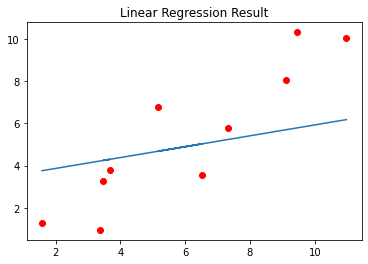

In [26]:
with tf.Session() as sess:
  sess.run(init)
  sp=sess.run(predictions)
  print(sp)
  plt.plot(x_data, y_label, 'ro', label ='Original data') 
  plt.plot(x_data, sp, label ='Fitted line') 
  plt.title('Linear Regression Result') 


# extra

In [21]:
with tf.Session() as sess:       
    sess.run(init) # first step variable initaliser

    for epoch in range(epochs):
        for (_x, _y) in zip(x_data, y_label): 
            sess.run(optimiser,feed_dict = {xph : _x, yph : _y}) 
    
    training_cost = sess.run(cost, feed_dict ={xph: x_data, yph:y_label}) 
   
    weight= sess.run(weight) # since here both have same name in a statement therfore if we execute it more then 1 it will cause error
    bias = sess.run(bias) 


TypeError: ignored

In [28]:
so=tf.math.subtract([1],[2,3,4])
with tf.Session() as sess:
  g=sess.run(so)
print(g)

[-1 -2 -3]


In [29]:

so2=tf.reduce_sum([2,3,4])
with tf.Session() as sess:
  gt=sess.run(so2)
print(gt)


9


In [31]:
var1=tf.Variable(57)
init=tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
  sess.run(init)
  f=sess.run(var1)
print(f)

57


# explanation

In [ ]:
 for (_x, _y) in zip(x_data, y_label): 
   print(_x,_y)  # to print every element we need to use loop
print(_x) # if printed outside it will the last element 

In [ ]:
for _x in x_data:
  print(_x)

In [ ]:
g=tf.placeholder(tf.float32)
p=tf.placeholder(tf.float32)

In [ ]:
add=g+p

In [ ]:
with tf.Session() as sess:
  for (_x, _y) in zip(x_data, y_label): 
    add_result=sess.run(add,feed_dict={g:_x,p:_y}) # last element of both these two list added

In [ ]:
print(add_result)

# 1


In [ ]:
learning_rate = 0.001
epochs = 500

In [ ]:
with tf.Session() as sess:       
    sess.run(init) # first step variable initaliser

    for epoch in range(epochs):
        for (_x, _y) in zip(x_data, y_label): 
            sess.run(optimiser,feed_dict = {xph : _x, yph : _y}) 
    
    training_cost = sess.run(cost, feed_dict ={xph: x_data, yph:y_label}) 
    weight = sess.run(W) 
    bias = sess.run(b) 
  


In [ ]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  weight = sess.run(W) 
  bias = sess.run(b) 
  

In [ ]:
predictions = weight * x_data + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 1.8138088 Weight = 0.1 bias = 0.01 



Text(0.5, 1.0, 'Linear Regression Result')

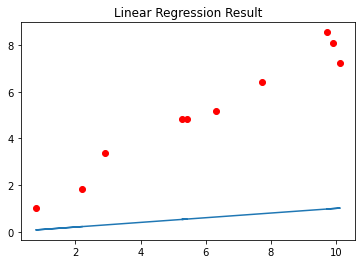

In [ ]:
plt.plot(x_data, y_label, 'ro', label ='Original data') 
plt.plot(x_data, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 